<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation-and-Preprocessing" data-toc-modified-id="Data-Preparation-and-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Null-Values-and-Duplicates" data-toc-modified-id="Null-Values-and-Duplicates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Null Values and Duplicates</a></span></li><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Types</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#Price" data-toc-modified-id="Price-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Price</a></span></li><li><span><a href="#Bedrooms" data-toc-modified-id="Bedrooms-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Bedrooms</a></span></li></ul></li><li><span><a href="#Relevancy" data-toc-modified-id="Relevancy-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Relevancy</a></span><ul class="toc-item"><li><span><a href="#Checking-For-Linearity" data-toc-modified-id="Checking-For-Linearity-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Checking For Linearity</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#VIF" data-toc-modified-id="VIF-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>VIF</a></span></li></ul></li></ul></li><li><span><a href="#Train-Test-Split,-Encoding,-and-Scaling" data-toc-modified-id="Train-Test-Split,-Encoding,-and-Scaling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train-Test Split, Encoding, and Scaling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#tt_split" data-toc-modified-id="tt_split-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>tt_split</a></span></li><li><span><a href="#scaling" data-toc-modified-id="scaling-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>scaling</a></span></li><li><span><a href="#encoding" data-toc-modified-id="encoding-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>encoding</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Iterations" data-toc-modified-id="Iterations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Iterations</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#2" data-toc-modified-id="2-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>2</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Areas-For-Further-Research" data-toc-modified-id="Areas-For-Further-Research-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Areas For Further Research</a></span></li></ul></div>

## Business Understanding
I have been hired by a real estate development company in King County, Washington, to model real estate prices based on the King County Housing dataset. My intention is to build a model that will accurately describe housing prices based on the features contained in this data set, and offer advice on the best improvements that can be made to increase house value. Additionally, given the robust location data in these records, I will make suggestions about the best areas to look for investment houses. This model should ideally be able to assist the real estate company in making informed decisions about what type and where to build new houses.

## Data Understanding
The dataset contains records of all recorded house sales in Kings County, WA from May 2014 to May 2015. The data comes directly from the King County assessors office. It is a robust set with 21597 entries to work with. There are 21 columns in this dataset:

* 'price' is the sale price of the house and will be our model's target feature.


* The majority of the columns are already formatted in a way that is easy to work with, however, categorical values will need to be encoded for purposes of this regression model.


* The continuous values may need to be scaled. I will make this determination during the exploratory stage of this process.

Information about the terms and data contained in this set can be examined at https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r.

## Data Preparation and Preprocessing

I will start here by looking at null values, data types, duplicates, outliers, and relevancy. Then decide which data is continuous or categorical, and make the appropriate transformations. Finally I will examine the relationship between variables and check for multicollinearity.  

In [1]:
# importing relevent libraries for scrubbing and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set_context('talk')

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE

from statsmodels.regression import linear_model
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# suppressing scientific notation
# adapted from https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('data/kc_house_data.csv')

In [2]:
def prelim(df):
    """displays core information
    on a dataframe at the beginning of EDA
    
    accepts a DataFrame as input, and displays
    the head, info, and sum of all null values
    for each column in that DataFrame
    """
    return (display(df.head()), 
            display(df.info()), 
            display(df.isna().sum()))

prelim(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

(None, None, None)

### Null Values and Duplicates

In [3]:
print('Waterfront value counts:')
print(df['waterfront'].value_counts())
print('--------------')
print('View value counts:')
print(df['view'].value_counts())
print('--------------')
print('yr_renovated value counts:')
print(df['yr_renovated'].value_counts())
print('--------------')

Waterfront value counts:
0.00    19075
1.00      146
Name: waterfront, dtype: int64
--------------
View value counts:
0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64
--------------
yr_renovated value counts:
0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64
--------------


**'waterfront'** is a binary, categorical variable that is missing 2376 entries. A value of 1 for 'waterfront' means the house has a waterfront view, whereas a value of 0 means the house has no waterfront view. With more time I would try and impute a value to each null entry based on location, either using the **'zipcode'** column or plotting the houses using the **'lat'** and **'long'** variables. However, for the sake of simplicity and clarity, I will assign the null entries a 1 or 0 based on the proportion of waterfront views in the data set.

In [4]:
# calculating expected number of additional waterfront view houses
waterfront_ratio = 146/19075

# imputing null values according to ratio of expected waterfront view houses
# note the minimal impact on model output despite not being able to set a
# random seed for the .choice method
df['waterfront'] = df['waterfront'].fillna(
    pd.Series(np.random.choice([0, 1], p=[1-0.008, .008], size=len(df))))

**'view'**, also a categorical, missing 63 entries, is a count of the number of times that a house has been viewed.  The vast majority of the entries for this feature are 0, which I will use to impute as a value to the NaNs.

In [5]:
# imputing NaNs with value of 0
df['view'] = df['view'].fillna(0)

**'yr_renovated'** is a (semi-)continuous variable. The overwhelming majority of entries for this variable are 0.00, suggesting that most houses have never been renovated, thereby obviating any usefulness this column may have as a predictor. An alternative option would be to turn this variable into a binary, with a value of 0 for never renovated, and a value of 1 for 'has been renovated' independent of time.

In [6]:
# creating binary from categorical
def is_renovated(value):
    if value == 0:
        return 0
    else:
        return 1

df['is_renovated'] = df['yr_renovated'].apply(is_renovated)
df = df.drop('yr_renovated', axis=1)

In [7]:
# sanity check that NaNs have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [8]:
# investigating duplicate entries
dupes = df.loc[df['id'].duplicated(keep=False)]
dupes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
93,6021501535,7/25/2014,430000.00,3,1.50,1580,5000,1.00,0.00,0.00,...,8,1290,290.0,1939,98117,47.69,-122.39,1570,4500,0
94,6021501535,12/23/2014,700000.00,3,1.50,1580,5000,1.00,0.00,0.00,...,8,1290,290.0,1939,98117,47.69,-122.39,1570,4500,0
313,4139480200,6/18/2014,1380000.00,4,3.25,4290,12103,1.00,0.00,3.00,...,11,2690,1600.0,1997,98006,47.55,-122.10,3860,11244,0
314,4139480200,12/9/2014,1400000.00,4,3.25,4290,12103,1.00,0.00,3.00,...,11,2690,1600.0,1997,98006,47.55,-122.10,3860,11244,0
324,7520000520,9/5/2014,232000.00,2,1.00,1240,12092,1.00,0.00,0.00,...,6,960,280.0,1922,98146,47.50,-122.35,1820,7460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.00,4,2.50,2680,5539,2.00,0.00,0.00,...,8,2680,0.0,2013,98045,47.48,-121.73,2680,5992,0
20763,6300000226,6/26/2014,240000.00,4,1.00,1200,2171,1.50,0.00,0.00,...,7,1200,0.0,1933,98133,47.71,-122.34,1130,1598,0
20764,6300000226,5/4/2015,380000.00,4,1.00,1200,2171,1.50,0.00,0.00,...,7,1200,0.0,1933,98133,47.71,-122.34,1130,1598,0
21564,7853420110,10/3/2014,594866.00,3,3.00,2780,6000,2.00,0.00,0.00,...,9,2780,0.0,2013,98065,47.52,-121.89,2850,6000,0


There are a number of duplicate entries in the **'id'** column, which would suggest some cleaning is in order, but after looking at the corresponding price for each entry, it is clear that there were some houses that were sold multiple times in the year that the data was collected.

A side quest analyzing the houses that were flipped multiple times could be interesting, but is beyond the scope of business problem. The absence of data in the **'yr_renovated'** column would frustrate this analysis, as I would want to know what sort of improvements were made to the properties between the sales.

### Data Types
The majority of the columns are of the expected data type. We could recast **'date'** as a pandas date-time type, but it is not immediately clear that doing so would benefit our analysis. Alternatively I can use **'date'** and **'yr_built'** to engineer an **'age'** feature.

In [9]:
# isolating the year and recasting as int.
df['date'] = [x.strip()[-4:] for x in df['date']]
df['date'] = df['date'].astype(int)

# engineering 'age' feature as difference between 'date' and 'yr_built'
df['age'] = df['date'] - df['yr_built']
df = df.drop(['date', 'yr_built'], axis=1)
df['age']

0        59
1        63
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: age, Length: 21597, dtype: int64

**'sqft_basement'** is another object data type that should be recast as an int, however, it appears that the variable **'sqft_living'** is the sum of **'sqft_basement'** and **'sqft_above'**. If this is the case, we will most likely want to eliminate one or two of those columns to reduce the impact of multicollinearity.

The rest of the columns are in a data type suitable to perform a regression model.

In [10]:
# recast 'sqft_basement' as int
df['sqft_basement'] = df['sqft_basement'].replace('?', 0.0)
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float).astype(int)
df['sqft_basement'].head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement, dtype: int64

### Outliers

#### Price

In [11]:
df['price'].describe()

count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

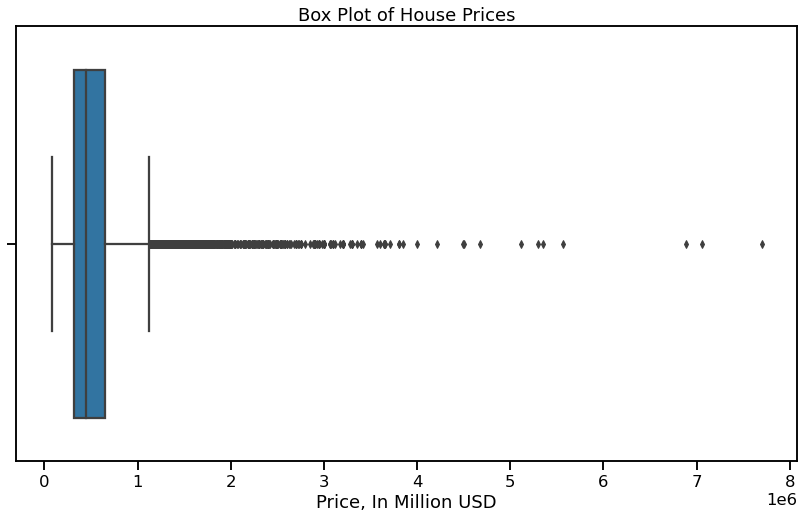

In [12]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x=df['price'])
ax.set_title('Box Plot of House Prices')
ax.set_xlabel('Price, In Million USD');

As we can see, the **'price'** column has a lot of outliers, defined above using the IQR method. I will remove the values that lie outside the inter-quartile range.

In [13]:
IQR_limit = 1.5 * (df['price'].quantile(.75) - df['price'].quantile(.25))
df = df.loc[df['price'] <= IQR_limit]

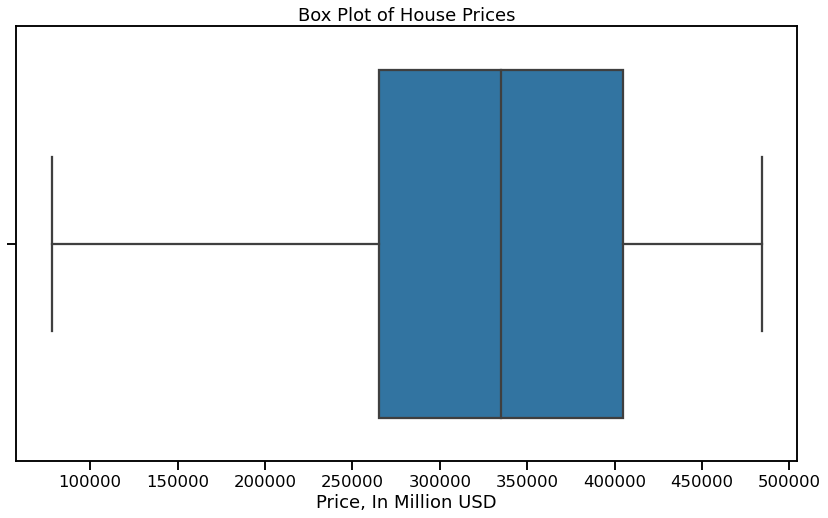

In [14]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x=df['price'])
ax.set_title('Box Plot of House Prices')
ax.set_xlabel('Price, In Million USD');

In [15]:
# # identifying outliers based on z-score and removing.
# df['z_score'] = np.abs(stats.zscore(df['price']))
# df = (df.loc[df['z_score'] < 3])
# df = df.drop('z_score', axis=1)

# # checking new aggregate values
# df['price'].describe()

#### Bedrooms

**'bedrooms'** also has a pretty obvious outlier we should examine.

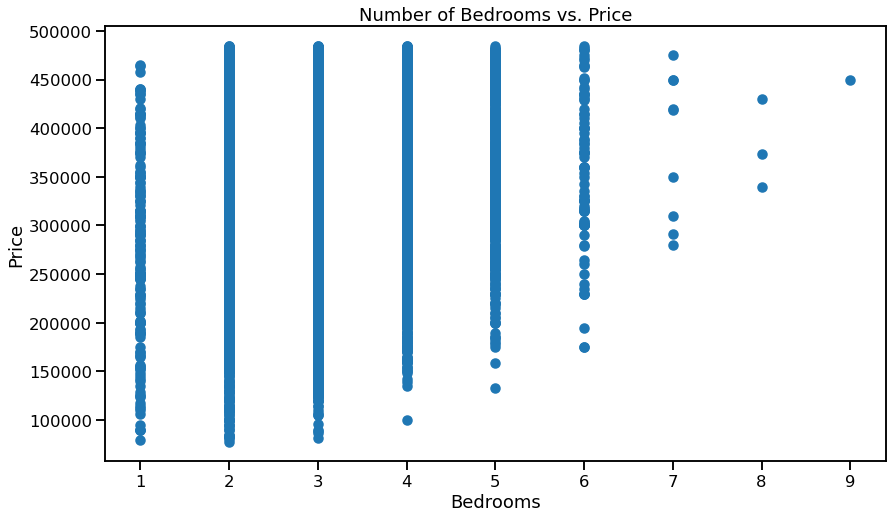

In [16]:
plt.figure(figsize=(14,8))
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs. Price');

In [17]:
# investigating outlier
df.loc[df['bedrooms'] > 15]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated,age


Given the sale price this house, and other variables (only 1.75 bathrooms for 33 bedrooms?) it is very likely that this is an entry error. Let's change this entry to the more likely 3 bedrooms the data reflects.

In [18]:
# replacing entry error
df['bedrooms'].replace({33 : 3}, inplace=True)

In [19]:
df.shape

(11911, 20)

After removing outliers from our data set, we have culled 9686 entries.

### Relevancy

Deciding which columns are relevant to a regression model is subjective. Intuitively, a column like **'id'**, which is a unique identifier of a particular house will not have any sort of linear relationship to house price, and can be eliminated.

#### Checking For Linearity

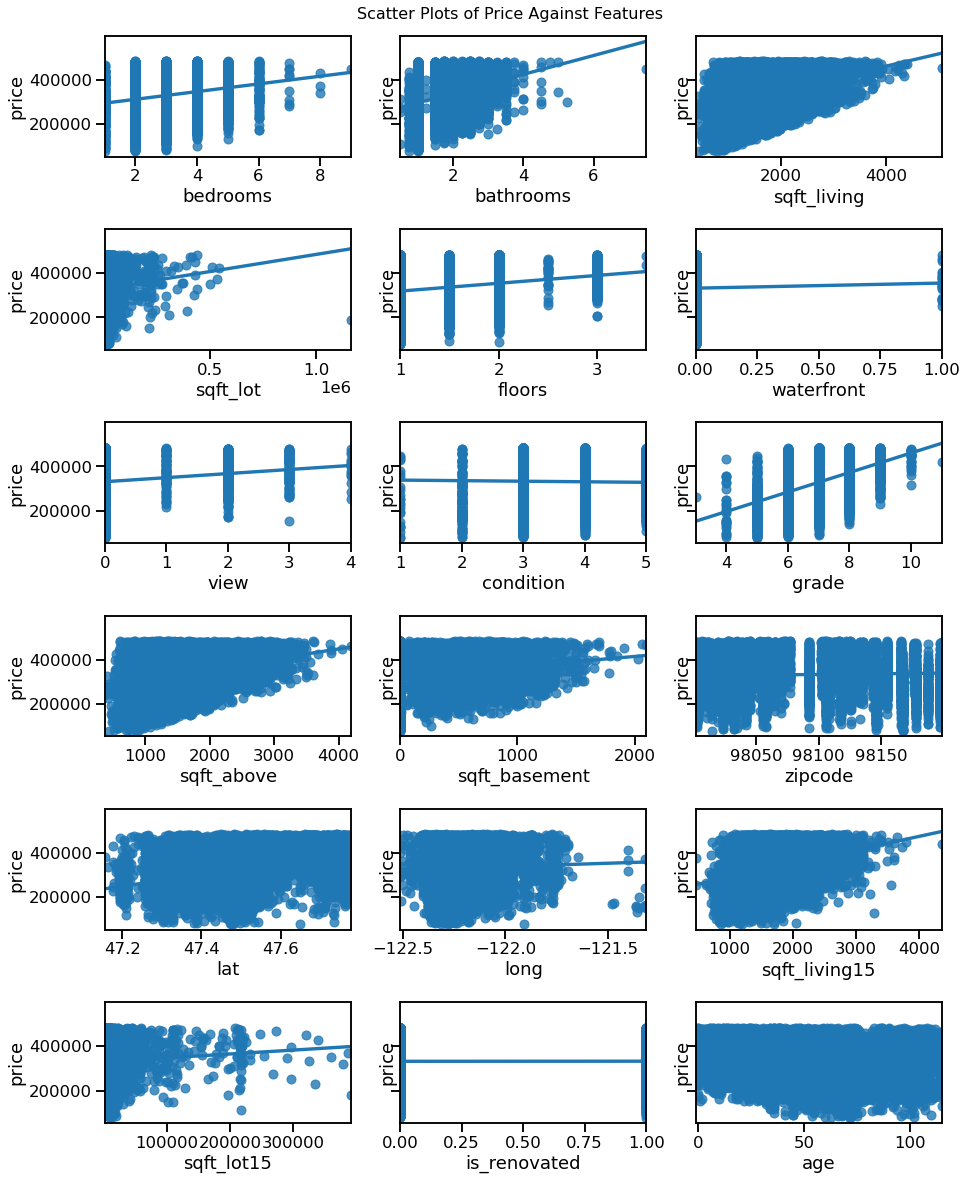

In [20]:
fig,ax = plt.subplots(figsize=(15,20), ncols=3, nrows=6, sharey=True)
fig.suptitle('Scatter Plots of Price Against Features', fontsize=16, y=.9)
cols = list(df.drop(['price','id'],axis=1).columns)
plt.subplots_adjust(hspace = 0.6)
for i, col in enumerate(cols):
    sns.regplot(x=col, y='price', ci=None, data=df, ax=ax[i//3][i%3])

A cursory examination of scatter plots of the independent variables illustrates which variables we will want to treat as **categorical** from their distinctive distributions. We can also deduce which features have an apparent linear relationship with price, and which features have a more 'blobish', less defined relationship.

Looking at the scatter plot of **'sqft_lot'** it is hard to imagine a linear relationship between the variables. We will keep it in our regression for the time being, but this is a strong candidate for removal.

**'sqft_basement'** is complicated by the presence of so many entries with 0. Whether or not so many houses really have no basement, or if 0 is being used as a placeholder value is unknown. Coupled with the correlation between this and **'sqft_living'** and **'sqft_above'**, this variable is ripe for dropping.

Unsurprisingly, given its similarity to **'sqft_lot'**, **'sqft_lot15'** lacks a clear linear relationship with **'price'**. It's on the chopping block.

#### Heatmap

Creating a heat map of the variables will help us decide which features can be discarded, and give us an inking of which features may interfere with our modeling due to multicollinearity. I will also run a **variance inflation factor** to test for multicollinearity.

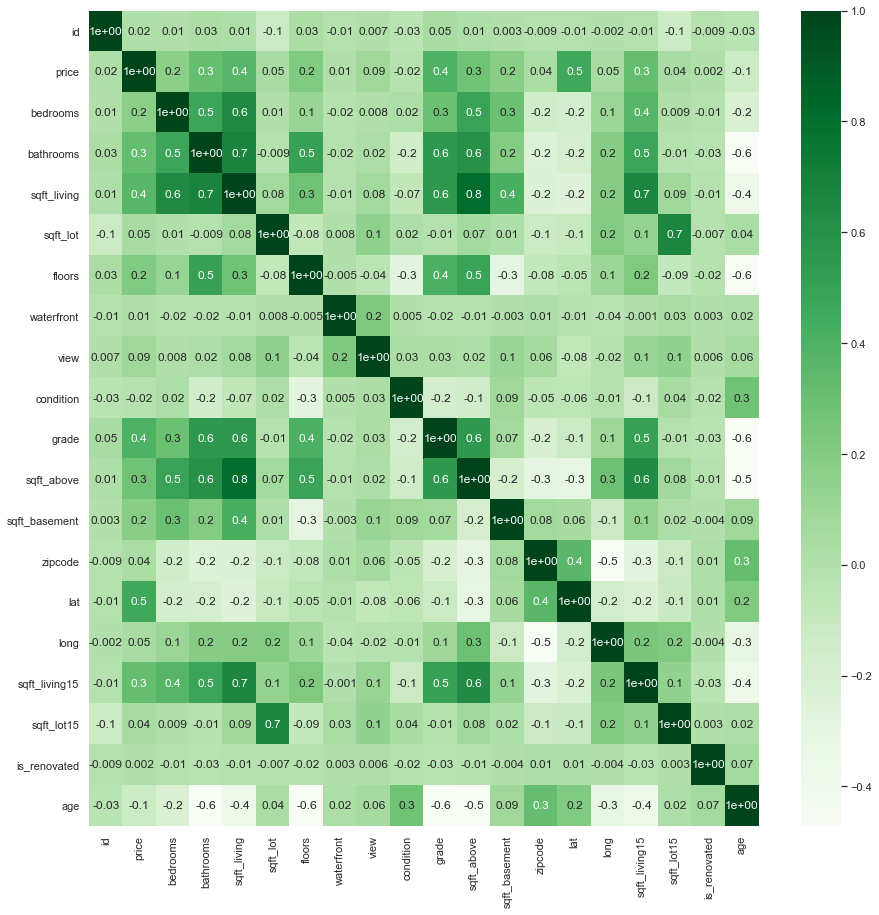

In [21]:
# plot a heatmap using seaborn
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(data=df.corr(), annot=True, robust=True, fmt='.1', cmap="Greens")
plt.tight_layout;

Right off the bat, we can see that **'price'** most strongly correlates, intuitively and perhaps unsurprisingly with **'sqft_living'**, and **'grade'**. 

Other significant correlations include:

**'bathrooms'** and **'sqft_living'**

**'sqft_living'** and **'sqft_above'**

**'sqft_living'** and **'grade'**

**'grade'** and **'sqft_above'**

The relationships between **'sqft_above'**, **'sqft_living'**, and **'sqft_basement'** suggest some strong collinearity and require further investigation. The relationship between **'sqft_living15'** and **'sqft_lot15'** also will be looked at closely.

#### VIF

In [22]:
def vif_func(df):

    vif_dct = {}
    df['const'] = 1
    for i in range(len(df.columns)):
        vif = variance_inflation_factor(df.values, i).round(2)
        v = df.columns[i]
        vif_dct[v] = vif
    
    return vif_dct

In [23]:
vif_func(df)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


{'id': 1.03,
 'price': 2.2,
 'bedrooms': 1.8,
 'bathrooms': 2.93,
 'sqft_living': 106.85,
 'sqft_lot': 1.84,
 'floors': 2.13,
 'waterfront': 1.06,
 'view': 1.15,
 'condition': 1.17,
 'grade': 2.18,
 'sqft_above': 89.71,
 'sqft_basement': 37.17,
 'zipcode': 1.61,
 'lat': 2.07,
 'long': 1.54,
 'sqft_living15': 2.12,
 'sqft_lot15': 1.87,
 'is_renovated': 1.01,
 'age': 2.6,
 'const': 0.0}

Generally we are looking really good here. With very few VIF values over 10, we can eliminate the multicollinearity and move forward with our processing.

In [24]:
df = df.drop(['sqft_basement'], axis=1)
vif_func(df)

{'id': 1.03,
 'price': 2.2,
 'bedrooms': 1.8,
 'bathrooms': 2.93,
 'sqft_living': 5.46,
 'sqft_lot': 1.84,
 'floors': 2.13,
 'waterfront': 1.06,
 'view': 1.15,
 'condition': 1.17,
 'grade': 2.18,
 'sqft_above': 4.46,
 'zipcode': 1.61,
 'lat': 2.07,
 'long': 1.54,
 'sqft_living15': 2.12,
 'sqft_lot15': 1.87,
 'is_renovated': 1.01,
 'age': 2.6,
 'const': 0.0}

In [25]:
df = df.drop('const', axis=1)

By dropping the **'sqft_basement'** column we have eliminated any multicollinearity flags. Important to note the marginally higher values of **'sqft_living'** and **'sqft_above'**. If we need to minimize multicollinearity later, these would be two candidates for dropping.

Let's go ahead and eliminate irrelevant variables (**'id', 'lat', 'long'**) and prepare our data for modeling via a trait-test split and encoding and scaling our training data.

## Train-Test Split, Encoding, and Scaling

In [26]:
continuous = ['bedrooms', 'bathrooms', 'floors',
              'condition', 'grade', 'sqft_living',
              'sqft_lot', 'sqft_above', 
              'sqft_living15', 'sqft_lot15', 'age']
categorical = [ 'waterfront', 'view', 'zipcode', 'is_renovated']

A note on categorical vs. continuous:

Variables that have no relation to a linear value and are non-ordinal (ie. **'zipcode'**) and those that are binary values, I have treated as categorical.

Variables that might be considered categorical, but that I have chosen to keep as continuous are generally ordinal and whose order has an implicit value associated with it (ie. **'grade.'**)

In [27]:
# eliminating variables with no linearity
preprocessed = df.drop(['id', 'lat', 'long'], axis=1)

# setting X and y for train_test_split and regression modeling
y = preprocessed['price']
X = preprocessed.drop('price', axis=1)

#### tt_split

In [28]:
# creating the tt split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# checking shapes of split variables
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8933, 15), (8933,), (2978, 15), (2978,))

#### scaling

As there is no uniform scale between the variables, it makes sense, for interpretability to scale our variables. This will add a layer of complexity to the model, but is unavoidable.

In [29]:
# scaling the X_train continuous data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[continuous]),
                              columns=X_train[continuous].columns)

# only transform the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test[continuous]),
                              columns=X_test[continuous].columns)

#### encoding

In [30]:
# instantiating ohe
ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)

# fit_transforming categorical columns of X_train
feature_arr_train = ohe.fit_transform(X_train[categorical])

# get feature names for assigning to columns
feature_labels = ohe.get_feature_names(categorical)
feature_labels = np.array(feature_labels).ravel()
features_train = pd.DataFrame(feature_arr_train, columns=feature_labels)

# transforming categorical columns of X_test
feature_arr_test = ohe.transform(X_test[categorical])

# get feature names for assigning to columns
feature_labels = ohe.get_feature_names(categorical)
feature_labels = np.array(feature_labels).ravel()
features_test = pd.DataFrame(feature_arr_test, columns=feature_labels)

## Modeling

### Baseline

In [31]:
# merging processed continuous values with encoded categories
X_train = X_train_scaled.merge(features_train, left_index=True, right_index=True)
X_test = X_test_scaled.merge(features_test, left_index=True, right_index=True)

# adding constant
X_train_int = sm.add_constant(X_train)
X_test_int = sm.add_constant(X_test)

# resetting indicies to ensure alignment
X_train_int.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# fitting model
model = sm.OLS(y_train ,X_train_int).fit()
model.summary2() #.summary2() supresses scientific notation and increases legibility

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       0.685      
Dependent Variable:     price              AIC:                  218375.8731
Date:                   2021-09-30 09:14   BIC:                  218979.1613
No. Observations:       8933               Log-Likelihood:       -1.0910e+05
Df Model:               84                 F-statistic:          231.9      
Df Residuals:           8848               Prob (F-statistic):   0.00       
R-squared:              0.688              Scale:                2.3997e+09 
----------------------------------------------------------------------------
                  Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
const          246428.0931  3182.4652 77.4331 0.0000 240189.7226 252666.4637
bedrooms        -1069.2963   702.9396 -1.5212 0.1283  -2447.2211    308.6284
bathrooms        7908.5786   893.4461  8.8518 0.0000   6157.2168   9659.9403
floors          -4998.7205   825.5100 -6.0553 0.0000  -6616.9118  -3380.5292
condition        8835.8261   576.4467 15.3281 0.0000   7705.8567   9965.7955
grade           16225.0066   766.6951 21.1623 0.0000  14722.1062  17727.9070
sqft_living     23279.6960  1213.3731 19.1859 0.0000  20901.2030  25658.1890
sqft_lot         6598.1056   784.0089  8.4159 0.0000   5061.2662   8134.9450
sqft_above      10145.8765  1141.5844  8.8875 0.0000   7908.1061  12383.6470
sqft_living15   11579.0112   776.3357 14.9150 0.0000  10057.2130  13100.8095
sqft_lot15      -1353.9640   804.1493 -1.6837 0.0923  -2930.2833    222.3553
age              1364.6169   881.7488  1.5476 0.1217   -363.8154   3093.0492
waterfront_1.0   5288.1912 12271.3303  0.4309 0.6665 -18766.4648  29342.8472
view_1.0        37652.3937  6174.4937  6.0981 0.0000  25548.9528  49755.8345
view_2.0        27963.6388  3843.7117  7.2752 0.0000  20429.0716  35498.2060
view_3.0        37190.2670  6166.7453  6.0308 0.0000  25102.0146  49278.5193
view_4.0        50511.2153 15906.8233  3.1754 0.0015  19330.1491  81692.2814
zipcode_98002   -3072.9621  5041.4146 -0.6095 0.5422 -12955.3050   6809.3808
zipcode_98003    6141.9265  4774.3600  1.2864 0.1983  -3216.9273  15500.7803
zipcode_98004  192769.8785 49138.0601  3.9230 0.0001  96447.8741 289091.8830
zipcode_98005  184065.1139 22156.5498  8.3075 0.0000 140633.1330 227497.0947
zipcode_98006  155695.5410  7522.5755 20.6971 0.0000 140949.5468 170441.5353
zipcode_98007  182197.6532  8993.2714 20.2593 0.0000 164568.7536 199826.5527
zipcode_98008  184492.1585  6912.2785 26.6905 0.0000 170942.4880 198041.8290
zipcode_98010   55444.2986  7530.9439  7.3622 0.0000  40681.9003  70206.6969
zipcode_98011  142878.6539  6142.5058 23.2606 0.0000 130837.9168 154919.3911
zipcode_98014   86793.8247  7372.2528 11.7730 0.0000  72342.4978 101245.1516
zipcode_98019   95385.3117  5806.7577 16.4266 0.0000  84002.7186 106767.9047
zipcode_98022   11416.9102  5123.6356  2.2283 0.0259   1373.3950  21460.4255
zipcode_98023   -7852.4254  4052.5625 -1.9376 0.0527 -15796.3887     91.5378
zipcode_98024  118354.6396  9535.3166 12.4122 0.0000  99663.2056 137046.0737
zipcode_98027  131253.5691  5901.6241 22.2402 0.0000 119685.0158 142822.1224
zipcode_98028  115840.3942  5180.4813 22.3609 0.0000 105685.4483 125995.3401
zipcode_98029  176770.2604  7339.7352 24.0840 0.0000 162382.6755 191157.8452
zipcode_98030   14512.9277  4785.6528  3.0326 0.0024   5131.9372  23893.9182
zipcode_98031   17813.7857  4757.4201  3.7444 0.0002   8488.1379  27139.4334
zipcode_98032   -1295.6804  5843.6145 -0.2217 0.8245 -12750.5213  10159.1605
zipcode_98033  179612.3556  7442.7156 24.1326 0.0000 165022.9053 194201.8060
zipcode_98034  154462.4837  4396.1645 35.1357 0.0000 145844.9807 163079.9867
zipcode_98038   42802.2094  4062.1332 10.5369 0

For our baseline model we have an initial R2 score of .685. The variables **'bedrooms', 'sqft_lot15',  'age', and 'waterfront'** all have p-values greater than .05 and will be dropped from subsequent iterations.

In [32]:
def model_diagnostics(model, X_train, y_train):
    '''
    Expects as inputs OLS results, and the X and y data fed to the model.
    Returns a scatter plot and QQ plot of residuals'''
    
    fig, axes = plt.subplots(ncols=2, figsize=(10,8))
    # predicting our 'y hat' values
    model_preds = model.predict(X_train)
    # obtaining residuals
    residuals = y_train - model_preds
    # plotting
    axes[0].scatter(model_preds, residuals)
    axes[0].axhline()
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[1])
    plt.tight_layout();

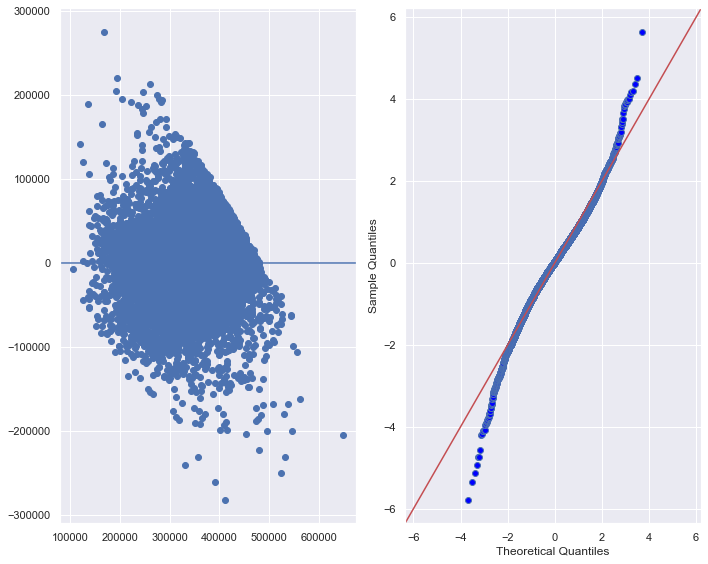

In [33]:
model_diagnostics(model, X_train_int, y_train)

The homoscedasticity of the residuals are acceptable, with no obvious red flags. The QQ-plot, plotting residuals against a normal distribution, is a little problematic. If we are unable to verify the assumptions necessary to legitimize our regression model, we will have to approach the results with skepticism.

In [34]:
def train_test_validation(X_train, y_train, X_test):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # checking predictions from test against train
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    metrics_dct = {}

    for split, y_pred in [('train', y_train_pred), ('test', y_test_pred)]:
        y_true = y_train.copy() if split == 'train' else y_test.copy()

        r2 = r2_score(y_true, y_pred).round(3)
        mse = mean_squared_error(y_true, y_pred).round(3)
        mae = mean_absolute_error(y_true, y_pred).round(3)
        split_dct = {
            'r2': r2,
            'mse': mse,
            'mae': mae,
            'rmse': np.sqrt(mse).round(3)
        }
        metrics_dct[split] = split_dct
        
    return metrics_dct

In [35]:
ttv_model = train_test_validation(X_train_int, y_train, X_test_int)
ttv_model

{'train': {'r2': 0.688,
  'mse': 2376904771.238,
  'mae': 36819.039,
  'rmse': 48753.51},
 'test': {'r2': 0.683,
  'mse': 2415071405.649,
  'mae': 37356.343,
  'rmse': 49143.376}}

In [36]:
r2_diff = 100*(1 - ttv_model['train']['r2']/ttv_model['test']['r2']).round(4)
mse_diff =100*(1 - ttv_model['train']['mse']/ttv_model['test']['mse']).round(4)
mae_diff =100*(1 - ttv_model['train']['mae']/ttv_model['test']['mae']).round(4)
rmse_diff =100*(1 - ttv_model['train']['rmse']/ttv_model['test']['rmse']).round(4)

print(f'% difference between Train and Test r2: {r2_diff}')
print(f'% difference between Train and Test mse: {mse_diff}')
print(f'% difference between Train and Test mse: {mae_diff}')
print(f'% difference between Train and Test mse: {rmse_diff}')

% difference between Train and Test r2: -0.73
% difference between Train and Test mse: 1.58
% difference between Train and Test mse: 1.44
% difference between Train and Test mse: 0.79


Our test model has performed well against the training model, suggesting the training is neither over nor under fit. While the values themselves are large, the difference between the Train and Test data is not that great. 

Let's continue to refine our model and see if we can improve the normality of our residuals without sacrificing R2.

### Iterations

In this section we will attempt to brute force a better QQ plot, while preserving as high a R2 value as possible. We will programmatically eliminate variables, comparing the JB Score, until we happen upon an imporoved version.

#### 1

In [37]:
# merging processed continuous values with encoded categories
# dropping sqft_lot due to high p-value
X_train_2 = X_train_scaled.drop(['bedrooms','sqft_lot15', 'age'],
                                axis=1).merge(features_train.drop('waterfront_1.0',
                                                                  axis=1),
                                              left_index=True, right_index=True)
X_test_2 = X_test_scaled.drop(['bedrooms','sqft_lot15', 'age'],
                                axis=1).merge(features_test.drop('waterfront_1.0',
                                                                  axis=1),
                                              left_index=True, right_index=True)
# adding constant
X_train_2_int = sm.add_constant(X_train_2)
X_test_2_int = sm.add_constant(X_test_2)
# resetting indicies to ensure alignment
X_train_2_int.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# fitting model
model_2 = sm.OLS(y_train ,X_train_2_int).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       0.685      
Dependent Variable:     price              AIC:                  218375.3590
Date:                   2021-09-30 09:14   BIC:                  218950.2571
No. Observations:       8933               Log-Likelihood:       -1.0911e+05
Df Model:               80                 F-statistic:          243.4      
Df Residuals:           8852               Prob (F-statistic):   0.00       
R-squared:              0.687              Scale:                2.4007e+09 
----------------------------------------------------------------------------
                  Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
const          246033.4760  3170.2173 77.6078 0.0000 239819.1145 252247.8374
bathrooms        7292.7302   828.8076  8.7991 0.0000   5668.0750   8917.3854
floors          -5323.8077   775.0377 -6.8691 0.0000  -6843.0613  -3804.5540
condition        8957.0153   563.0578 15.9078 0.0000   7853.2914  10060.7391
grade           15940.2754   723.6262 22.0283 0.0000  14521.8001  17358.7506
sqft_living     22795.6958  1133.4211 20.1123 0.0000  20573.9276  25017.4640
sqft_lot         5758.9765   563.1697 10.2260 0.0000   4655.0332   6862.9198
sqft_above      10298.5751  1136.9589  9.0580 0.0000   8069.8719  12527.2783
sqft_living15   11568.3859   773.0930 14.9638 0.0000  10052.9443  13083.8275
view_1.0        38446.9909  6165.8154  6.2355 0.0000  26360.5622  50533.4196
view_2.0        28373.8289  3833.3805  7.4018 0.0000  20859.5137  35888.1441
view_3.0        37458.4778  6134.5468  6.1062 0.0000  25433.3428  49483.6128
view_4.0        54945.6432 14404.2898  3.8145 0.0001  26709.8931  83181.3933
zipcode_98002   -3047.0425  5041.0786 -0.6044 0.5456 -12928.7262   6834.6411
zipcode_98003    6273.2905  4774.1350  1.3140 0.1889  -3085.1217  15631.7027
zipcode_98004  192894.4282 49135.3590  3.9258 0.0001  96577.7245 289211.1318
zipcode_98005  184423.9124 22153.4338  8.3248 0.0000 140998.0422 227849.7826
zipcode_98006  155997.8491  7513.9733 20.7610 0.0000 141268.7182 170726.9801
zipcode_98007  182546.6132  8987.2164 20.3118 0.0000 164929.5838 200163.6426
zipcode_98008  184499.1380  6904.5441 26.7214 0.0000 170964.6295 198033.6464
zipcode_98010   54544.1444  7515.3629  7.2577 0.0000  39812.2895  69275.9994
zipcode_98011  143275.2813  6140.4028 23.3332 0.0000 131238.6671 155311.8954
zipcode_98014   86091.2600  7342.7566 11.7247 0.0000  71697.7534 100484.7666
zipcode_98019   94874.2381  5790.2593 16.3851 0.0000  83523.9864 106224.4898
zipcode_98022   11285.7247  5120.2790  2.2041 0.0275   1248.7900  21322.6595
zipcode_98023   -7799.1419  4052.8409 -1.9244 0.0543 -15743.6505    145.3666
zipcode_98024  117985.9603  9520.1741 12.3933 0.0000  99324.2103 136647.7104
zipcode_98027  130468.3036  5873.6709 22.2124 0.0000 118954.5459 141982.0613
zipcode_98028  116258.7205  5175.2958 22.4642 0.0000 106113.9400 126403.5010
zipcode_98029  177098.8426  7338.8154 24.1318 0.0000 162713.0617 191484.6234
zipcode_98030   14512.7705  4786.1440  3.0322 0.0024   5130.8178  23894.7232
zipcode_98031   17891.7941  4757.8899  3.7604 0.0002   8565.2260  27218.3623
zipcode_98032   -1134.8000  5838.8475 -0.1944 0.8459 -12580.2957  10310.6958
zipcode_98033  179743.8413  7441.6509 24.1538 0.0000 165156.4789 194331.2037
zipcode_98034  154455.7573  4394.1054 35.1507 0.0000 145842.2912 163069.2234
zipcode_98038   42505.8187  4057.6745 10.4754 0.0000  34551.8353  50459.8021
zipcode_98042   15238.1042  4048.4446  3.7639 0.0002   7302.2134  23173.9950
zipcode_98045   95010.5339  5512.2494 17.2363 0.0000  84205.2462 105815.8217
zipcode_98052  177236.0318  6067.3749 29.2113 0.0000 165342.5692 189129.4944
zipcode_98053  159234.6285  6703.4961 23.7540 0

This iteration of our model shows a very slight improvement of the normality of residuals, and no change in  R2. Since there are no more p-values that we should use as a basis for exclusion, we will attempt to engineer better normality by trial and error.

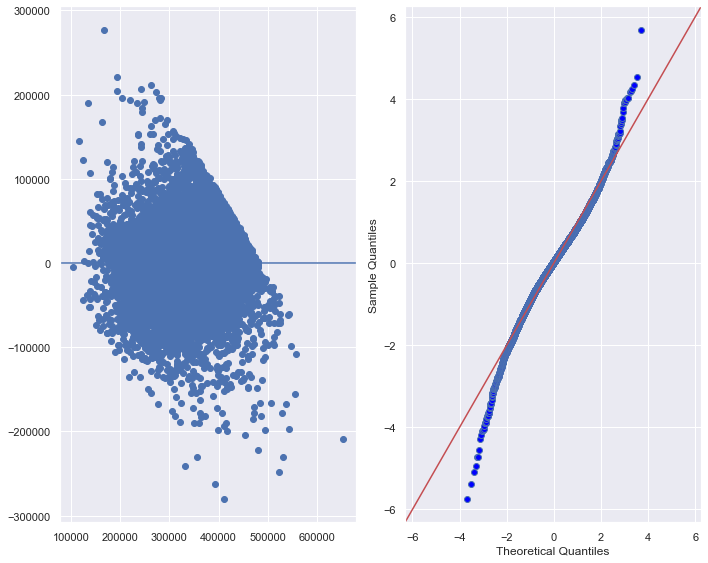

In [38]:
model_diagnostics(model_2, X_train_2_int, y_train)

#### 2

In [39]:
# merging processed continuous values with encoded categories
# dropping sqft_lot due to high p-value
X_train_3 = X_train_scaled.drop(['bedrooms',
                               'sqft_lot15', 
                               'age'], 
                                axis=1).merge(features_train.drop(['waterfront_1.0',
                                                                  'is_renovated_1'],
                                                                 axis=1),
                                              left_index=True, right_index=True)
X_test_3 = X_test_scaled.drop(['bedrooms',
                               'sqft_lot15', 
                               'age'], 
                                axis=1).merge(features_test.drop(['waterfront_1.0',
                                                                  'is_renovated_1'],
                                                                 axis=1),
                                              left_index=True, right_index=True)
# adding constant
X_train_3_int = sm.add_constant(X_train_3)
X_test_3_int = sm.add_constant(X_test_3)

# resetting indicies to ensure alignment
X_train_3_int.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# fitting model
model_3 = sm.OLS(y_train ,X_train_3_int).fit()
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       0.685      
Dependent Variable:    price              AIC:                  218375.0003
Date:                  2021-09-30 09:14   BIC:                  218942.8009
No. Observations:      8933               Log-Likelihood:       -1.0911e+05
Df Model:              79                 F-statistic:          246.4      
Df Residuals:          8853               Prob (F-statistic):   0.00       
R-squared:             0.687              Scale:                2.4008e+09 
---------------------------------------------------------------------------
                 Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------
const         246363.2701  3159.7658 77.9688 0.0000 240169.3961 252557.1441
bathrooms       7271.1228   828.6638  8.7745 0.0000   5646.7496   8895.4960
floors         -5329.8894   775.0504 -6.8768 0.0000  -6849.1680  -3810.6107
condition       8939.4333   562.9089 15.8808 0.0000   7836.0013  10042.8653
grade          15927.7901   723.5856 22.0123 0.0000  14509.3945  17346.1857
sqft_living    22819.0142  1133.3137 20.1348 0.0000  20597.4564  25040.5719
sqft_lot        5744.9532   563.0823 10.2027 0.0000   4641.1812   6848.7251
sqft_above     10307.4030  1136.9780  9.0656 0.0000   8078.6623  12536.1437
sqft_living15  11542.6609   772.8572 14.9351 0.0000  10027.6816  13057.6402
view_1.0       38409.5676  6165.9638  6.2293 0.0000  26322.8482  50496.2870
view_2.0       28337.2905  3833.4091  7.3922 0.0000  20822.9194  35851.6616
view_3.0       37601.5453  6133.7382  6.1303 0.0000  25577.9955  49625.0950
view_4.0       55193.4777 14403.4888  3.8320 0.0001  26959.2983  83427.6571
zipcode_98002  -3040.3819  5041.2543 -0.6031 0.5465 -12922.4098   6841.6459
zipcode_98003   6176.7679  4773.7040  1.2939 0.1957  -3180.7994  15534.3352
zipcode_98004 192546.0790 49136.3388  3.9186 0.0001  96227.4563 288864.7018
zipcode_98005 184432.9923 22154.2167  8.3250 0.0000 141005.5882 227860.3965
zipcode_98006 155966.5687  7514.1992 20.7562 0.0000 141236.9952 170696.1423
zipcode_98007 182467.1405  8987.3185 20.3027 0.0000 164849.9114 200084.3696
zipcode_98008 184450.9045  6904.6849 26.7139 0.0000 170916.1203 197985.6887
zipcode_98010  54734.7526  7514.1427  7.2842 0.0000  40005.2898  69464.2155
zipcode_98011 143262.1506  6140.6115 23.3303 0.0000 131225.1275 155299.1736
zipcode_98014  86085.7046  7343.0152 11.7235 0.0000  71691.6913 100479.7178
zipcode_98019  95043.2425  5788.9477 16.4181 0.0000  83695.5621 106390.9230
zipcode_98022  11369.9865  5120.0339  2.2207 0.0264   1333.5323  21406.4407
zipcode_98023  -7849.8902  4052.7890 -1.9369 0.0528 -15794.2969     94.5164
zipcode_98024 118203.9063  9518.9772 12.4177 0.0000  99544.5028 136863.3098
zipcode_98027 130576.8176  5873.2625 22.2324 0.0000 119063.8606 142089.7746
zipcode_98028 116261.6269  5175.4784 22.4639 0.0000 106116.4885 126406.7653
zipcode_98029 177050.6318  7338.9777 24.1247 0.0000 162664.5329 191436.7307
zipcode_98030  14559.0753  4786.1757  3.0419 0.0024   5177.0606  23941.0899
zipcode_98031  17867.0494  4758.0188  3.7551 0.0002   8540.2289  27193.8699
zipcode_98032  -1252.2299  5838.3281 -0.2145 0.8302 -12696.7074  10192.2475
zipcode_98033 179788.7556  7441.8310 24.1592 0.0000 165201.0405 194376.4706
zipcode_98034 154476.4872  4394.2309 35.1544 0.0000 145862.7753 163090.1991
zipcode_98038  42467.9923  4057.7097 10.4660 0.0000  34513.9400  50422.0446
zipcode_98042  15207.0501  4048.5147  3.7562 0.0002   7271.0221  23143.0781
zipcode_98045  94929.2417  5512.0760 17.2220 0.0000  84124.2941 105734.1893
zipcode_98052 177323.6873  6067.2004 29.2266 0.0000 165430.5670 189216.8075
zipcode_98053 159172.6641  6703.5573 23.7445 0.0000 146032.1367 172313.1916
zipcode_98055  37936.

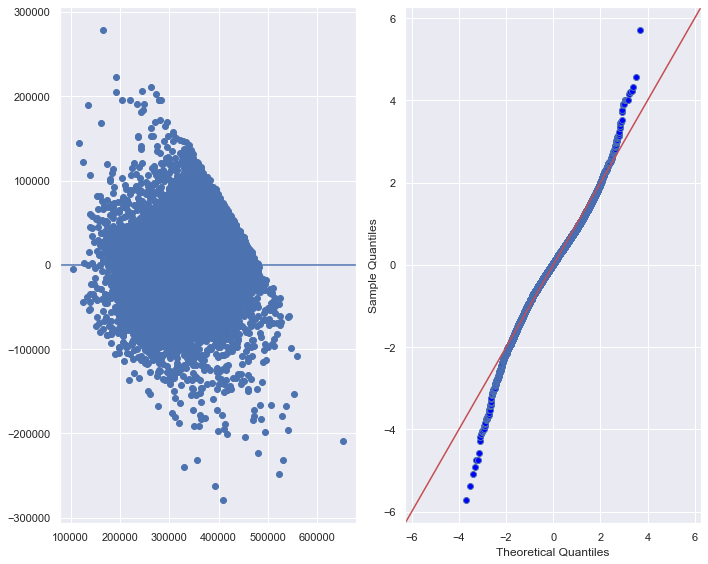

In [40]:
model_diagnostics(model_3, X_train_3_int, y_train)

In [41]:
ttv_model3 = train_test_validation(X_train_3_int, y_train, X_test_3_int)
ttv_model3

{'train': {'r2': 0.687,
  'mse': 2379334587.576,
  'mae': 36855.019,
  'rmse': 48778.423},
 'test': {'r2': 0.684,
  'mse': 2405711284.953,
  'mae': 37363.06,
  'rmse': 49048.051}}

In [42]:
r2_diff = 100*(1 - ttv_model3['train']['r2']/ttv_model3['test']['r2']).round(4)
mse_diff =100*(1 - ttv_model3['train']['mse']/ttv_model3['test']['mse']).round(4)
mae_diff =100*(1 - ttv_model3['train']['mae']/ttv_model3['test']['mae']).round(4)
rmse_diff =100*(1 - ttv_model3['train']['rmse']/ttv_model3['test']['rmse']).round(4)

print(f'% difference between Train and Test r2: {r2_diff}')
print(f'% difference between Train and Test mse: {mse_diff}')
print(f'% difference between Train and Test mse: {mae_diff}')
print(f'% difference between Train and Test mse: {rmse_diff}')

% difference between Train and Test r2: -0.44
% difference between Train and Test mse: 1.0999999999999999
% difference between Train and Test mse: 1.3599999999999999
% difference between Train and Test mse: 0.5499999999999999


After running several iterations of our model, the above is the model with the highest R2 value, and the best fit of residuals to a normal distribution. As we can see from the train_test_validation, our model is neither over nor underfit, with an acceptably small difference between our train and test errors.

## Conclusions

Our 3rd model, dropping the **'bedrooms', 'sqft_lot15','age', 'waterfront' and 'is_renovated'** variables, has an acceptable R2 score of .687, and a moderately improved distribution of the residuals. The model is neither over nor underfit.

Below we will examine the coefficients to make actionable suggestions to best answer the business questions.

In [43]:
def feature_selection(X_train, y_train, n):
    '''
    Performs a linear regression model and selects the top n
    features based on positive coefficient values'''
    
    # create and fit linear regression model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # extracting top n features by recursive feature elimination
    selector = RFE(linreg, n_features_to_select=n)
    selector = selector.fit(X_train ,y_train)
    estimators = selector.estimator_

    # creating df
    coefs = pd.DataFrame(selector.support_ , index=X_train.columns)
    coefs = coefs.loc[coefs[0] == True]
    coefs['coef_values'] = estimators.coef_

    return coefs.drop(0, axis=1).sort_values(['coef_values'], ascending=True)

In [44]:
feature_selection(X_train_3_int, y_train, 30)

,coef_values
zipcode_98027,70859.79
zipcode_98177,79565.18
zipcode_98136,81946.84
zipcode_98103,83056.41
zipcode_98065,84453.12
zipcode_98109,86723.75
zipcode_98122,86825.66
zipcode_98034,88948.11
zipcode_98006,91389.38
zipcode_98053,93660.05


The results are a classic good news/bad news situation. We can, with a high level of certainty, explain the change in our dependent variable (**'price'**), by the changes in our independent variables. The bad news is that the explanation that the model offers makes it hard to suggest actionable renovations to existing houses that will have a large impact on home price. Of the top 30 features that we identified as having a positive impact on house price, the overwhelming majority are features that are outside of the control of the homeowner -- ie. location.

Of the features that are in our control, for every square foot of living space we add to a house we can expect an increase in the price of the house of $85$USD (since our features have been scaled, we need to divide the coefficient by the standard deviation to arrive at the unit price.)

We can also offer advice on what type of room to build to increase the square foot of living space in a house. For each additional bathroom that we add to the house, we can expect an increase in house price of $11,186$USD.

Also worth noting is the relative importance of the **'grade'** variable, suggesting that during renovation we should endeavor to conform to the Kings County guidelines and best practices for building to ensure a higher grade, which correlates well with house price.

If we are looking to purchase and renovate existing houses, the data is clear. Buying a house in the following zip codes has a large impact on the price of the house:

98039

98004

98112

98040

Any exploration of potential home purchases may want to focus on these zip codes.

## Areas For Further Research

I would recommend soliciting newer data about King County house sales in order to further validate our model.

Additional research is in order to help understand the behavior of the **'bedrooms'** variable. This can be achieved by exploring the correlation between **'bedrooms'** and **'price'** to determine a more accurate representation of the impact of the number of bedrooms in a house.

Taking a more in depth look at our zipcode data will allow us to make better suggestions for areas that are ripe for reinvestment and development. An area for further study would be to look at existing home prices in zip codes adjacent to the above -- there may be under priced houses that will go up in value as housing becomes more scarce in the highest demand areas
